# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [42]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To scale, fit, split data for linear regression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [43]:
# Load the dataset
data_path = "SeoulBikeData.csv"
df = pd.read_csv(data_path)

In [44]:
#print infor about the data and the columns
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [45]:
# Summarize the dataset
print(df.describe())

       Rented Bike Count         Hour  Temperature (C)  Humidity (%)  \
count        8760.000000  8760.000000      8760.000000   8760.000000   
mean          714.876027    11.500000        12.945765     58.268014   
std          1160.468927     6.922582        12.376168     20.807845   
min             0.000000     0.000000       -17.800000     -2.200000   
25%           191.000000     5.750000         3.500000     42.000000   
50%           504.500000    11.500000        13.700000     57.000000   
75%          1066.000000    17.250000        22.500000     74.000000   
max         90997.000000    23.000000       195.000000    455.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  
count       8760.000000       8760.000000                8760.000000  
mean           1.848950       1436.825799                   4.073813  
std           10.665215        608.298712                  13.060369  
min           -0.700000         27.000000                 -30.60000

In [46]:
df.isnull().values.any()

False

In [47]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [48]:
df.shape

(8760, 14)

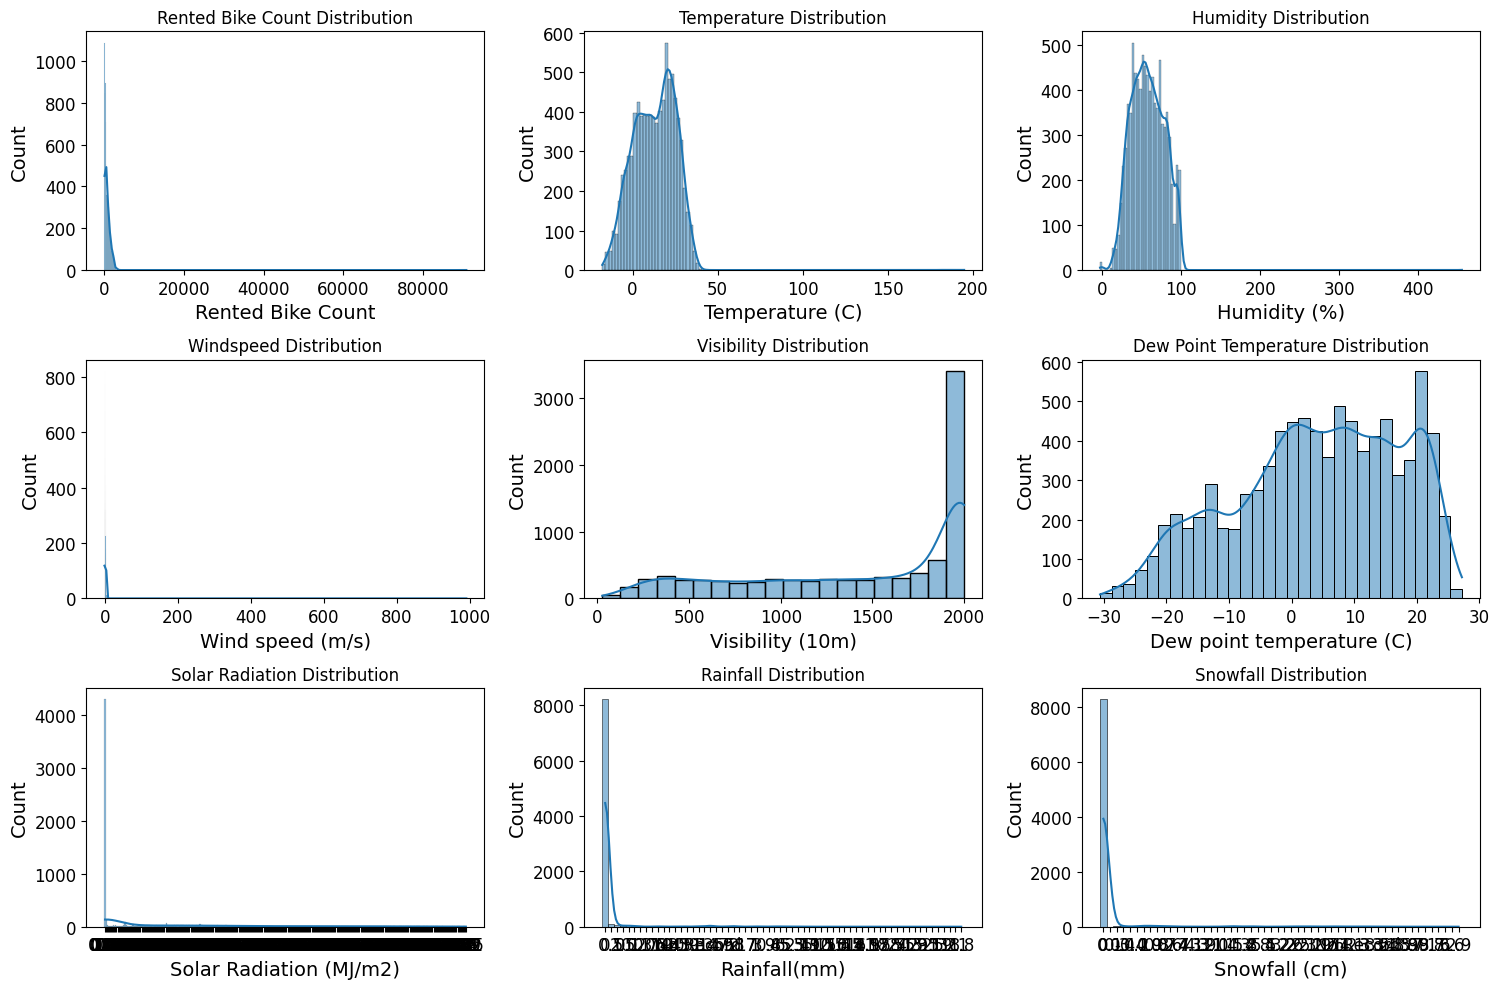

In [49]:
'''The code visualizes the distribution of the features in the dataset using histogram plots with kernel density estimates (KDE) 
for each feature. It creates a 3x3 grid of subplots to display the distribution of the following features: Rented Bike Count, 
Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall, and Snowfall. 
Each subplot contains a histogram and a KDE line to provide a detailed view of the feature distributions. 
The plt.tight_layout() function ensures that the subplots are neatly arranged without overlapping. The visualization is done to help gain
understanding of the data distribution and identifying any potential outliers or skewness.
'''

# Visualized each feature with histplot
plt.figure(figsize=(15, 10))

# Rented Bike Count
plt.subplot(3, 3, 1)
sns.histplot(df['Rented Bike Count'], kde=True)
plt.title('Rented Bike Count Distribution')

# Temperature
plt.subplot(3, 3, 2)
sns.histplot(df['Temperature (C)'], kde=True)
plt.title('Temperature Distribution')

# Humidity
plt.subplot(3, 3, 3)
sns.histplot(df['Humidity (%)'], kde=True)
plt.title('Humidity Distribution')

# Windspeed
plt.subplot(3, 3, 4)
sns.histplot(df['Wind speed (m/s)'], kde=True)
plt.title('Windspeed Distribution')

# Visibility
plt.subplot(3, 3, 5)
sns.histplot(df['Visibility (10m)'], kde=True)
plt.title('Visibility Distribution')

# Dew point temperature
plt.subplot(3, 3, 6)
sns.histplot(df['Dew point temperature (C)'], kde=True)
plt.title('Dew Point Temperature Distribution')

# Solar Radiation
plt.subplot(3, 3, 7)
sns.histplot(df['Solar Radiation (MJ/m2)'], kde=True)
plt.title('Solar Radiation Distribution')

# Rainfall
plt.subplot(3, 3, 8)
sns.histplot(df['Rainfall(mm)'], kde=True)
plt.title('Rainfall Distribution')

# Snowfall
plt.subplot(3, 3, 9)
sns.histplot(df['Snowfall (cm)'], kde=True)
plt.title('Snowfall Distribution')

plt.tight_layout()
plt.show()

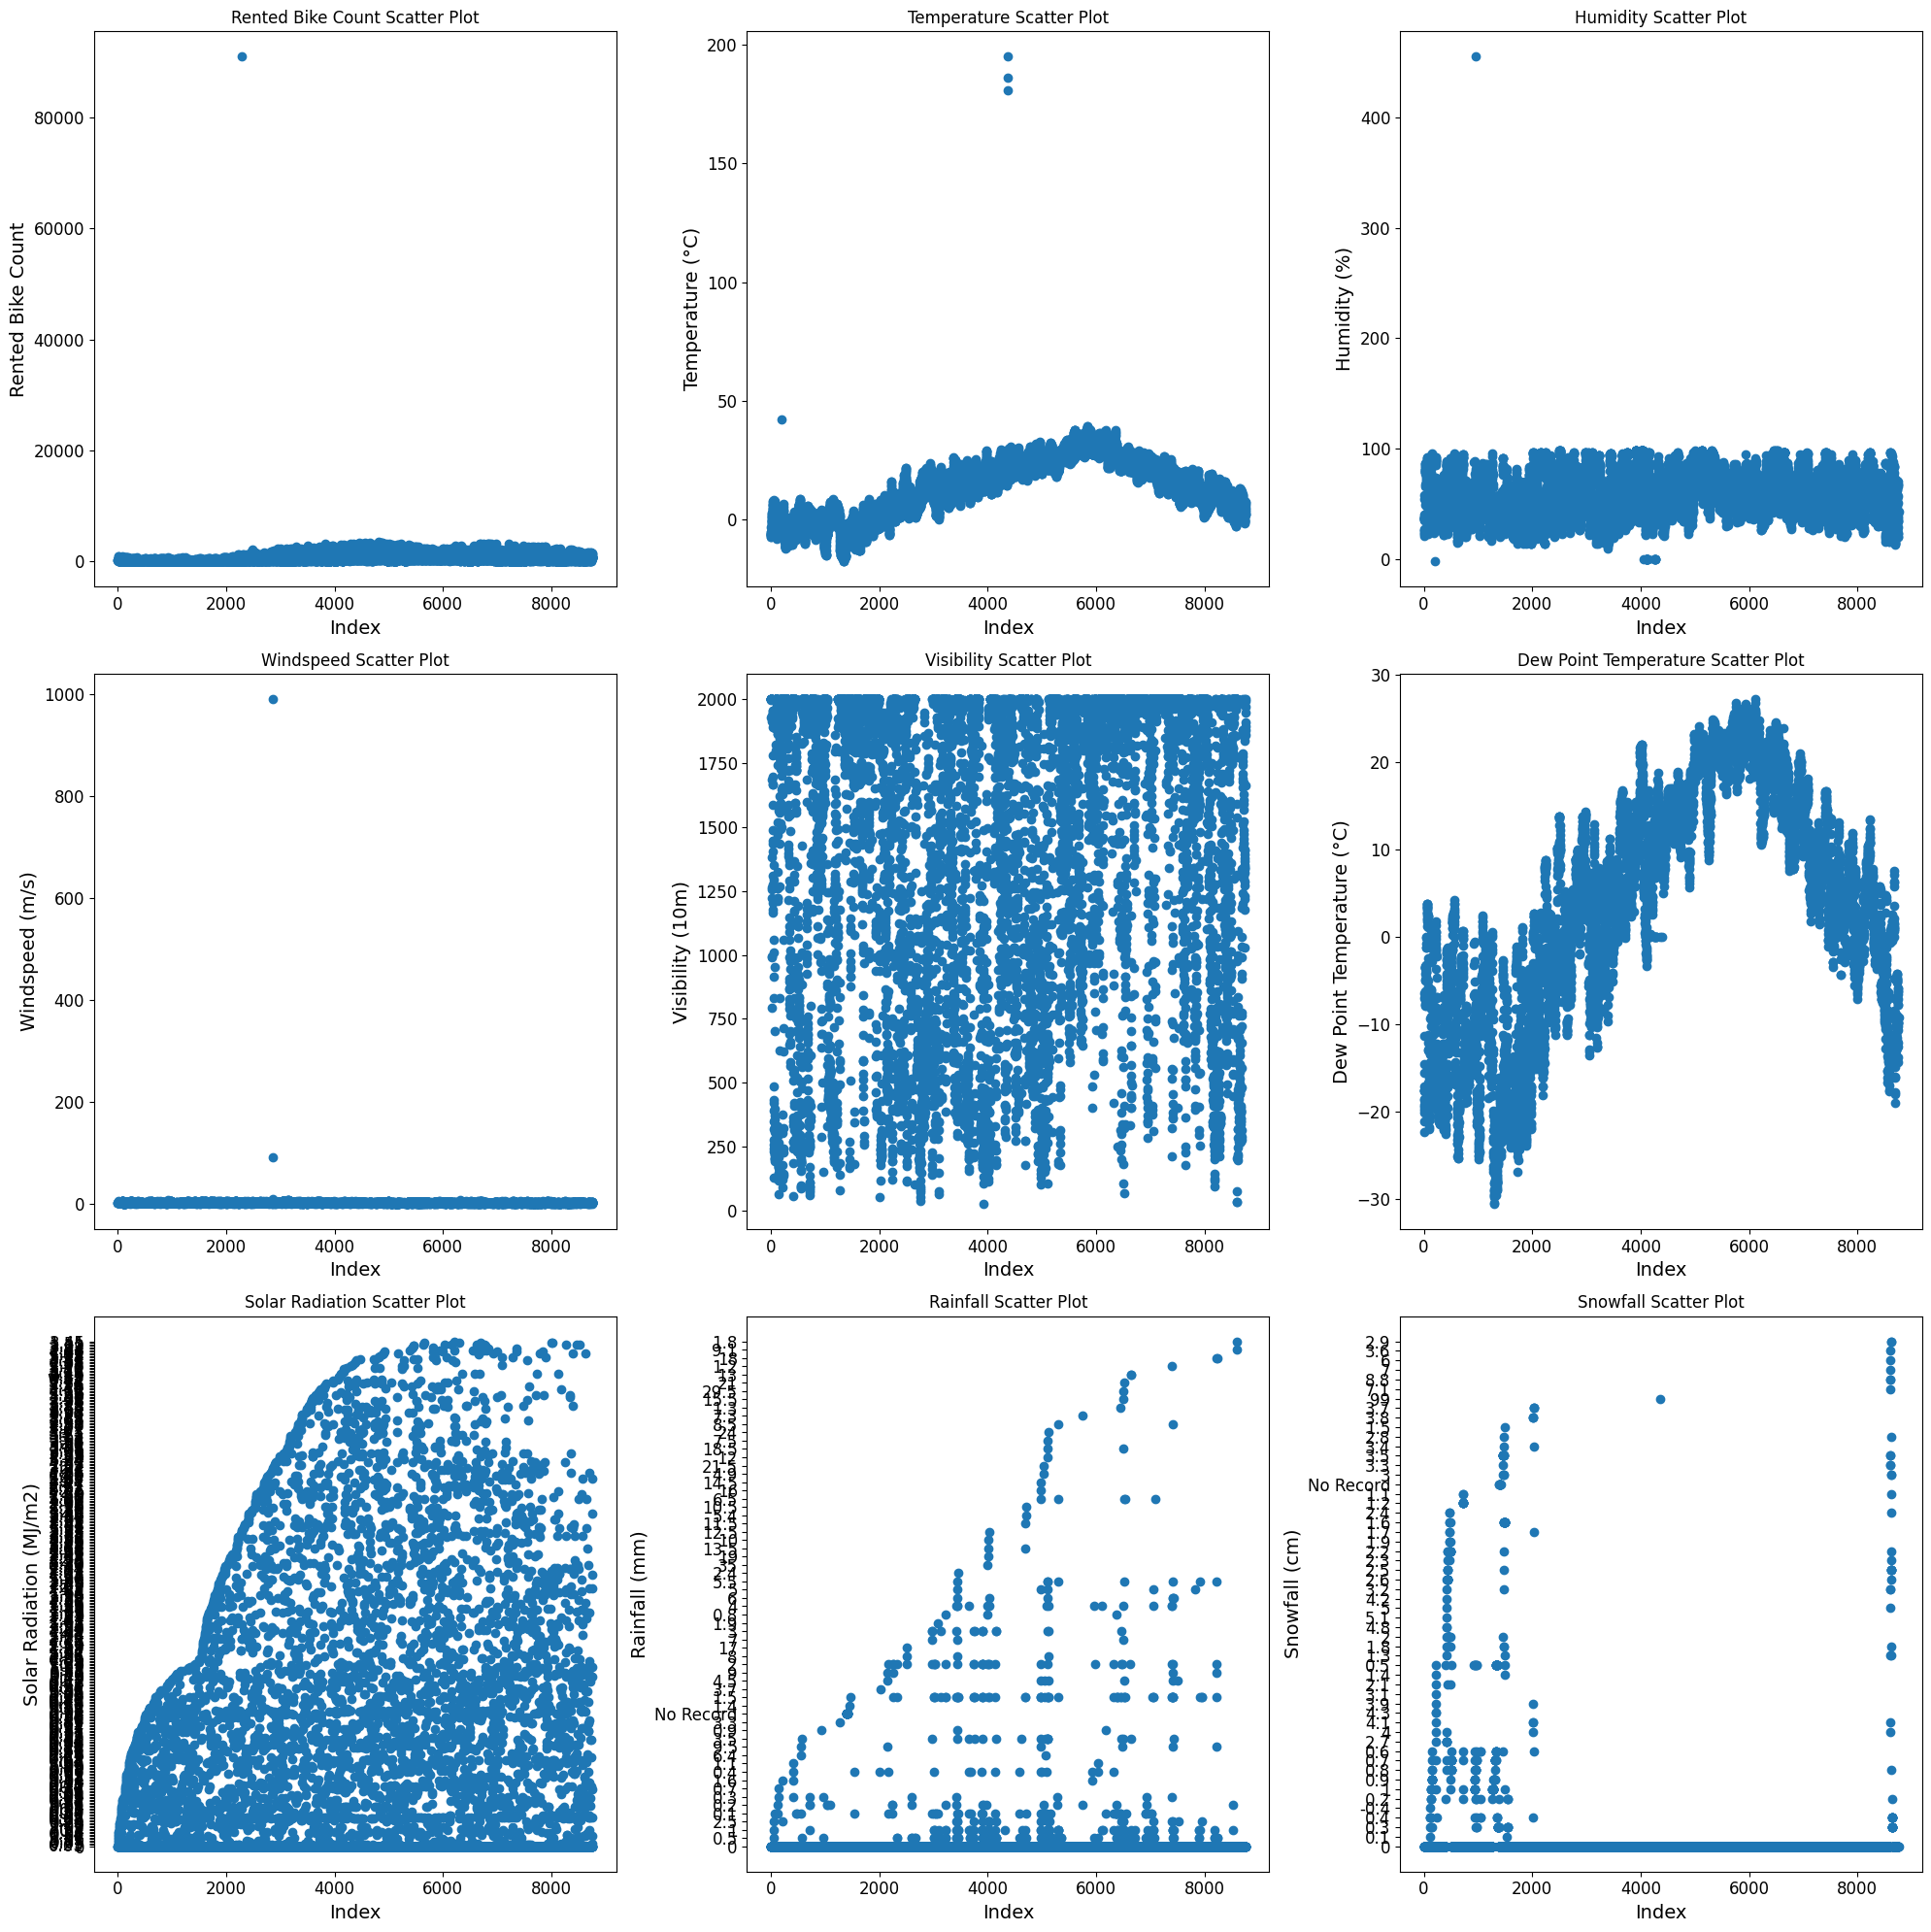

In [50]:
'''
The code creates scatter plots to visualize the relationship between each feature and the index of the data points in the dataset. 
It sets up a 3x3 grid of subplots to display scatter plots for the following features: Rented Bike Count, Temperature, Humidity, 
Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall, and Snowfall. Each scatter plot shows how the feature values 
vary with the data index, helping to identify patterns, trends, and potential outliers in the dataset. 
The plt.tight_layout() function ensures the subplots are neatly arranged without overlapping.
'''


# Visualized each feature with scatter plots
plt.figure(figsize=(20, 20))

# Rented Bike Count
plt.subplot(3, 3, 1)
plt.scatter(df.index, df['Rented Bike Count'])
plt.title('Rented Bike Count Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Rented Bike Count')

# Temperature
plt.subplot(3, 3, 2)
plt.scatter(df.index, df['Temperature (C)'])
plt.title('Temperature Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Temperature (°C)')

# Humidity
plt.subplot(3, 3, 3)
plt.scatter(df.index, df['Humidity (%)'])
plt.title('Humidity Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Humidity (%)')

# Windspeed
plt.subplot(3, 3, 4)
plt.scatter(df.index, df['Wind speed (m/s)'])
plt.title('Windspeed Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Windspeed (m/s)')

# Visibility
plt.subplot(3, 3, 5)
plt.scatter(df.index, df['Visibility (10m)'])
plt.title('Visibility Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Visibility (10m)')

# Dew Point Temperature
plt.subplot(3, 3, 6)
plt.scatter(df.index, df['Dew point temperature (C)'])
plt.title('Dew Point Temperature Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Dew Point Temperature (°C)')

# Solar Radiation
plt.subplot(3, 3, 7)
plt.scatter(df.index, df['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (MJ/m2)')

# Rainfall
plt.subplot(3, 3, 8)
plt.scatter(df.index, df['Rainfall(mm)'])
plt.title('Rainfall Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Rainfall (mm)')

# Snowfall
plt.subplot(3, 3, 9)
plt.scatter(df.index, df['Snowfall (cm)'])
plt.title('Snowfall Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Snowfall (cm)')

plt.tight_layout()
plt.show()


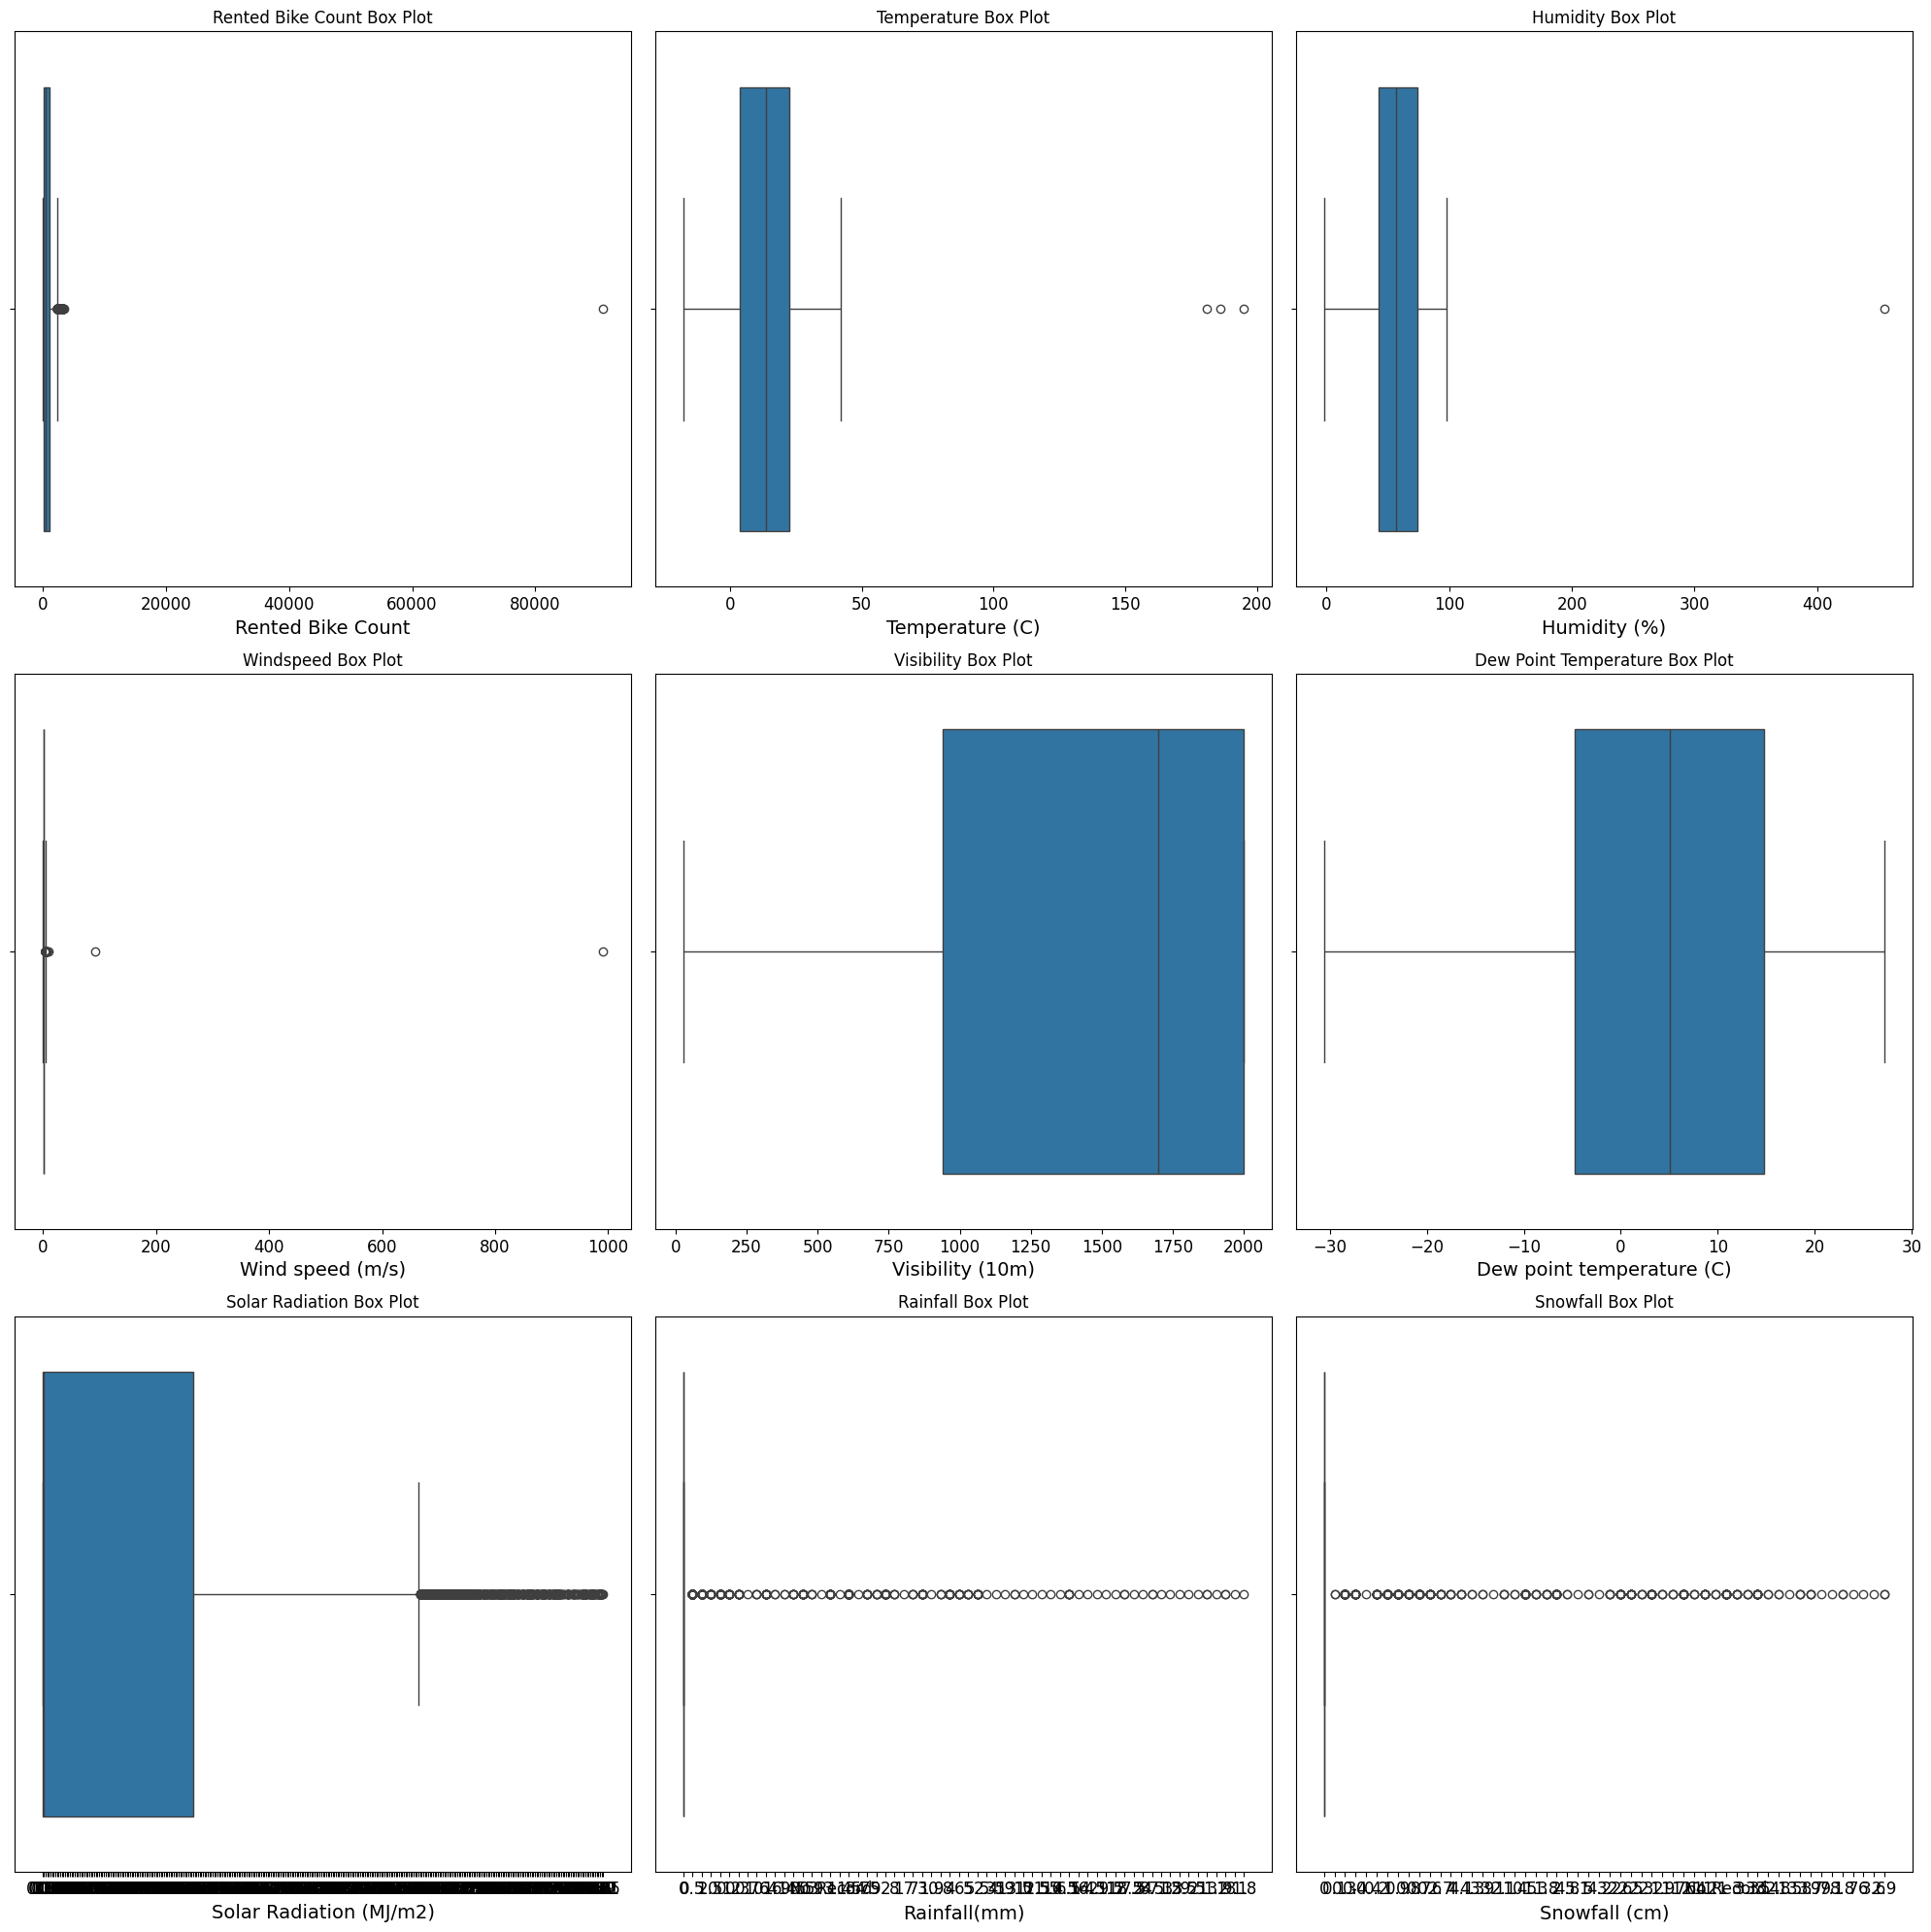

In [51]:
'''
The code creates box plots to visualize the distribution and detect potential outliers for each feature in the dataset. 
It sets up a 3x3 grid of subplots to display box plots for the following features: Rented Bike Count, Temperature, Humidity, 
Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall, and Snowfall. Each box plot provides a summary of 
the feature's distribution, showing the median, quartiles, and any outliers. The plt.tight_layout() function ensures that the 
subplots are neatly arranged without overlapping, making the visualization clear and easy to interpret.
'''


# Visualized each feature with box plots
plt.figure(figsize=(20, 20))

# Rented Bike Count
plt.subplot(3, 3, 1)
sns.boxplot(x=df['Rented Bike Count'])
plt.title('Rented Bike Count Box Plot')

# Temperature
plt.subplot(3, 3, 2)
sns.boxplot(x=df['Temperature (C)'])
plt.title('Temperature Box Plot')

# Humidity
plt.subplot(3, 3, 3)
sns.boxplot(x=df['Humidity (%)'])
plt.title('Humidity Box Plot')

# Windspeed
plt.subplot(3, 3, 4)
sns.boxplot(x=df['Wind speed (m/s)'])
plt.title('Windspeed Box Plot')

# Visibility
plt.subplot(3, 3, 5)
sns.boxplot(x=df['Visibility (10m)'])
plt.title('Visibility Box Plot')

# Dew Point Temperature
plt.subplot(3, 3, 6)
sns.boxplot(x=df['Dew point temperature (C)'])
plt.title('Dew Point Temperature Box Plot')

# Solar Radiation
plt.subplot(3, 3, 7)
sns.boxplot(x=df['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation Box Plot')

# Rainfall
plt.subplot(3, 3, 8)
sns.boxplot(x=df['Rainfall(mm)'])
plt.title('Rainfall Box Plot')

# Snowfall
plt.subplot(3, 3, 9)
sns.boxplot(x=df['Snowfall (cm)'])
plt.title('Snowfall Box Plot')

plt.tight_layout()
plt.show()

Key Observations:

- Outliers and Errors: Upon manually inspecting the data sheet and the histplots, scatter plots, and box plots above, I observed that there are some unrealistic values in the dataset, such as negative humidity, negative wind speed, and excessively high wind speed and humidity values. There was also an unrealistically high value of rented bike count, and unrealistic temperature value in the winter season, and 0 value for humidity. These will eventually be addressed during the data cleaning process.
- Variability: From the histograms above I also observed high standard deviations in features like Rented Bike Count, Temperature, Wind Speed, and Visibility indicate a wide range of values and potential outliers.

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [52]:
# Load the dataset
data_path = "SeoulBikeData.csv"
df = pd.read_csv(data_path)

# Checked column names to verify the correct names
print(df.columns)

# Step 1: Filter the DataFrame to keep only rows where 'Functioning Day' is 'Yes'
df = df[df['Functioning Day'] == 'Yes']

# Dropped the 'Functioning Day' column as it is no longer needed
df.drop(columns=['Functioning Day'], inplace=True)

# Step 2: Converted seasons to one-hot encoded format
df = pd.get_dummies(df, columns=['Seasons'], prefix='Season')

# Step 3: Replaced the Date feature with a binary Weekday feature
import datetime

def date_is_weekday(datestring):
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]), int(dsplit[1]), int(dsplit[0])).weekday()
    return int(wday <= 4)

df['Weekday'] = df['Date'].apply(date_is_weekday)
df.drop(columns=['Date'], inplace=True)

# Step 4: Converted remaining non-numerical features to a numerical format or replace with NaN
df['Holiday'] = df['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

# Converted relevant columns to numeric types, forcing errors to NaN
columns_to_convert = [
    'Wind speed (m/s)', 'Humidity (%)', 'Rented Bike Count',
    'Temperature (C)', 'Visibility (10m)', 'Dew point temperature (C)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Step 5: Identified and fixed the outliers and errors found in the data
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].apply(lambda x: np.nan if x < 0 else x)
df['Humidity (%)'] = df['Humidity (%)'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df['Rented Bike Count'] = df['Rented Bike Count'].apply(lambda x: np.nan if x < 0 else x)
df['Temperature (C)'] = df['Temperature (C)'].apply(lambda x: np.nan if x < -50 or x > 50 else x)
df['Visibility (10m)'] = df['Visibility (10m)'].apply(lambda x: np.nan if x < 0 else x)
df['Dew point temperature (C)'] = df['Dew point temperature (C)'].apply(lambda x: np.nan if x < -50 or x > 50 else x)
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].apply(lambda x: np.nan if x < 0 else x)
df['Rainfall(mm)'] = df['Rainfall(mm)'].apply(lambda x: np.nan if x < 0 else x)
df['Snowfall (cm)'] = df['Snowfall (cm)'].apply(lambda x: np.nan if x < 0 else x)

# Ensured all remaining columns are numeric before imputation
numeric_df = df.select_dtypes(include=[np.number])

# Combined the numeric_df with any non-numeric columns that may have been excluded
cleaned_df = pd.concat([numeric_df, df.select_dtypes(exclude=[np.number])], axis=1)

# Step 6: Saved the cleaned data to a new CSV file
cleaned_df.to_csv("CleanedSeoulBikeData.csv", index=False)

print(cleaned_df.columns)

print("Data cleaning completed and saved to CleanedSeoulBikeData.csv")
print("Data has null values? ",cleaned_df.isnull().values.any())


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')
Index(['Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Weekday', 'Season_Autumn', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')
Data cleaning completed and saved to CleanedSeoulBikeData.csv
Data has null values?  True


### Explanation
As instructed in the task, in the code above, I:

- removed rows with 'Functioning Day' as 'No' and dropped the column. The DataFrame was filtered to keep only rows where 'Functioning Day' is 'Yes' and then drop the 'Functioning Day' column.
- pd.get_dummies was used to to convert the 'Seasons' column into four separate binary columns as part of 'One-hot encoding for seasons' step.
- used a helper function to convert the date into a binary 'Weekday' feature and then drop the original 'Date' column.
- convert non-numerical features to numerical format. For example, converted 'Holiday' to binary format (1 for 'Holiday', 0 for 'No holiday').
- identified and fix outliers and errors. Invalid values (e.g., negative wind speed, unrealistic humidity) were replaced with NaN and then fill these NaN values with the mean of the column.
- DataFrame was cleaned and saved to a new CSV file called "CleanedSeoulBikeData.csv".

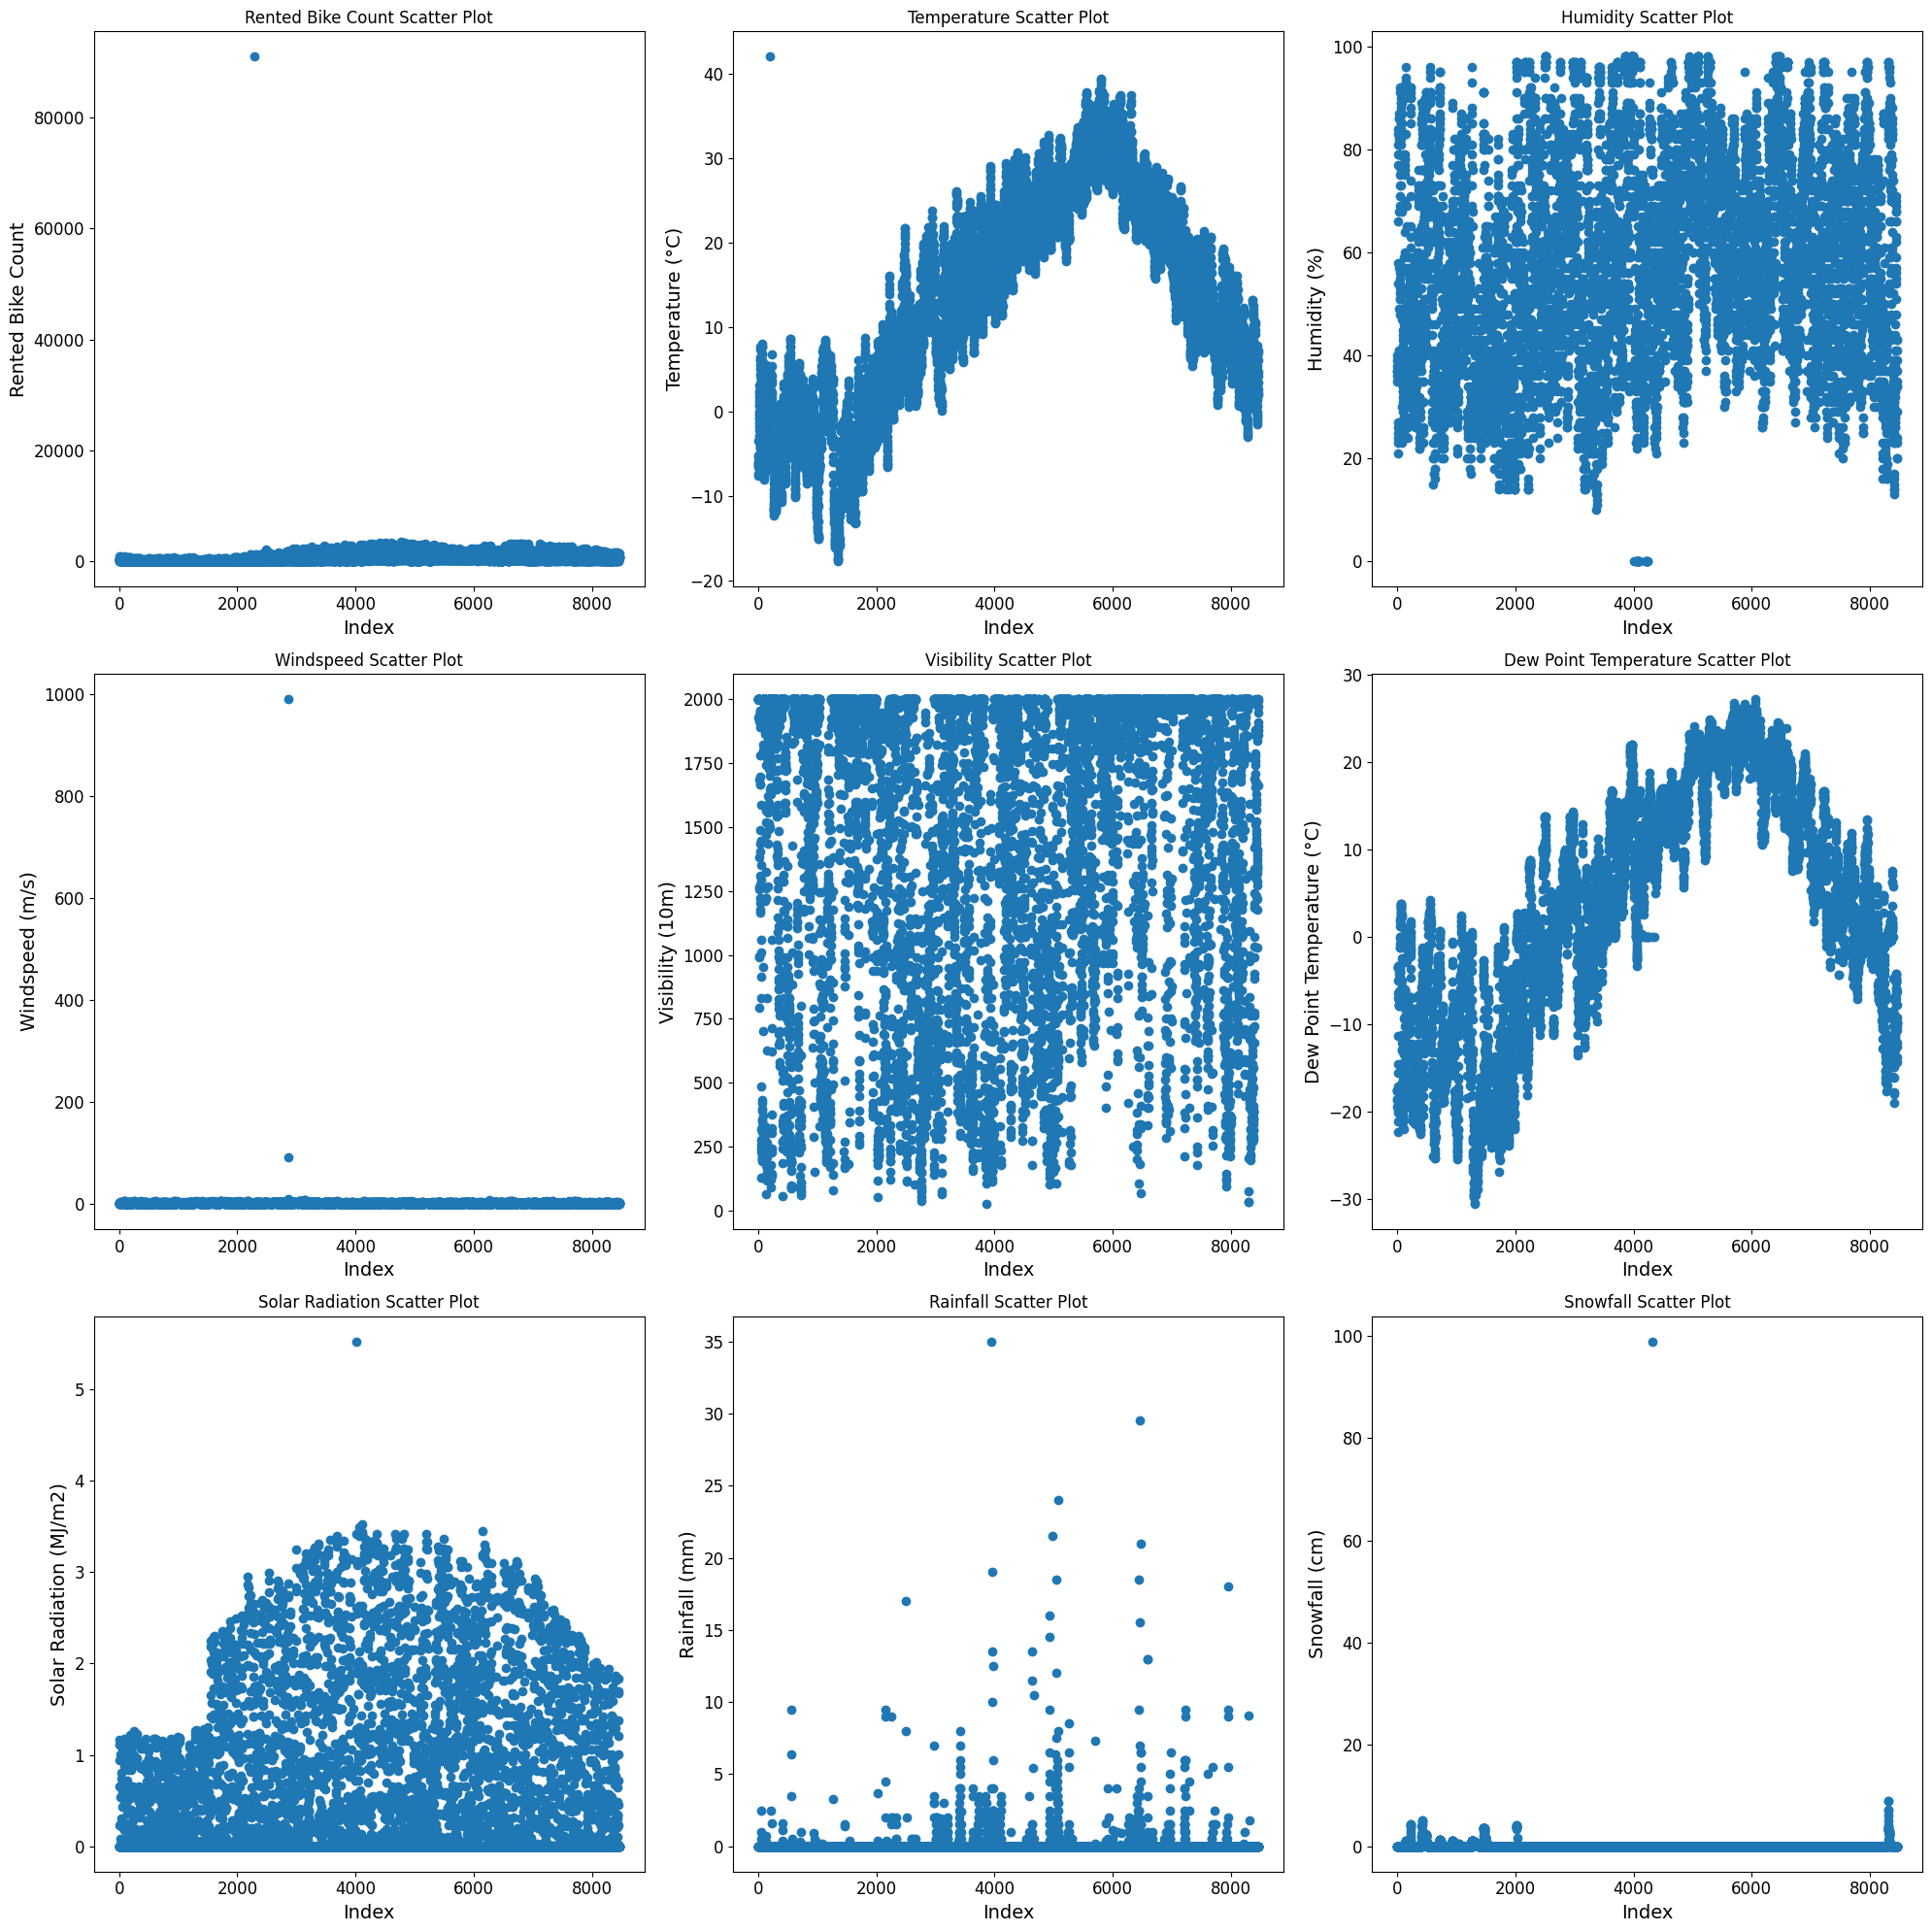

In [53]:
'''After cleaning the data the code below loads the cleaned data set to visualise the data again using scatter plots'''

# Loaded the cleaned dataset
cleaned_data_path = "CleanedSeoulBikeData.csv"
df_cleaned = pd.read_csv(cleaned_data_path)

# Visualized each feature with scatter plots
plt.figure(figsize=(20, 20))

# Rented Bike Count
plt.subplot(3, 3, 1)
plt.scatter(df_cleaned.index, df_cleaned['Rented Bike Count'])
plt.title('Rented Bike Count Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Rented Bike Count')

# Temperature
plt.subplot(3, 3, 2)
plt.scatter(df_cleaned.index, df_cleaned['Temperature (C)'])
plt.title('Temperature Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Temperature (°C)')

# Humidity
plt.subplot(3, 3, 3)
plt.scatter(df_cleaned.index, df_cleaned['Humidity (%)'])
plt.title('Humidity Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Humidity (%)')

# Windspeed
plt.subplot(3, 3, 4)
plt.scatter(df_cleaned.index, df_cleaned['Wind speed (m/s)'])
plt.title('Windspeed Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Windspeed (m/s)')

# Visibility
plt.subplot(3, 3, 5)
plt.scatter(df_cleaned.index, df_cleaned['Visibility (10m)'])
plt.title('Visibility Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Visibility (10m)')

# Dew Point Temperature
plt.subplot(3, 3, 6)
plt.scatter(df_cleaned.index, df_cleaned['Dew point temperature (C)'])
plt.title('Dew Point Temperature Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Dew Point Temperature (°C)')

# Solar Radiation
plt.subplot(3, 3, 7)
plt.scatter(df_cleaned.index, df_cleaned['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Solar Radiation (MJ/m2)')

# Rainfall
plt.subplot(3, 3, 8)
plt.scatter(df_cleaned.index, df_cleaned['Rainfall(mm)'])
plt.title('Rainfall Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Rainfall (mm)')

# Snowfall
plt.subplot(3, 3, 9)
plt.scatter(df_cleaned.index, df_cleaned['Snowfall (cm)'])
plt.title('Snowfall Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Snowfall (cm)')

plt.tight_layout()
plt.show()

As can be observed from the scatter plots above there still are some outliers and errors present. In the next steps below, I have removed the specific identified outliers and errors. Based on this, listed below are the identified outliers that I want to covert using np.nan:
1. in Rented Bike Count there is one value above 90997
2. in temperature there is 42C weather in winter season
3. in humidity there are values that are 0 and -2.2
4. in windspeed there are two outlier values: 91.8 and 991.1, which seem unrealistic
5. in snowfall there is one value 99, which seem unrealistic

In [54]:
# Summarize the dataset
summary_cleanedData = df_cleaned.describe()
print(summary_cleanedData)

       Rented Bike Count         Hour  Temperature (C)  Humidity (%)  \
count        8465.000000  8465.000000      8462.000000   8463.000000   
mean          739.789014    11.507029        12.774226     58.150656   
std          1172.685973     6.920899        12.109102     20.486008   
min             2.000000     0.000000       -17.800000      0.000000   
25%           214.000000     6.000000         3.000000     42.000000   
50%           542.000000    12.000000        13.500000     57.000000   
75%          1084.000000    18.000000        22.700000     74.000000   
max         90997.000000    23.000000        42.000000     98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
count       8464.000000       8465.000000                8465.000000   
mean           1.854549       1433.873479                   3.944997   
std           10.848133        609.051229                  13.242399   
min            0.000000         27.000000                 -30.6

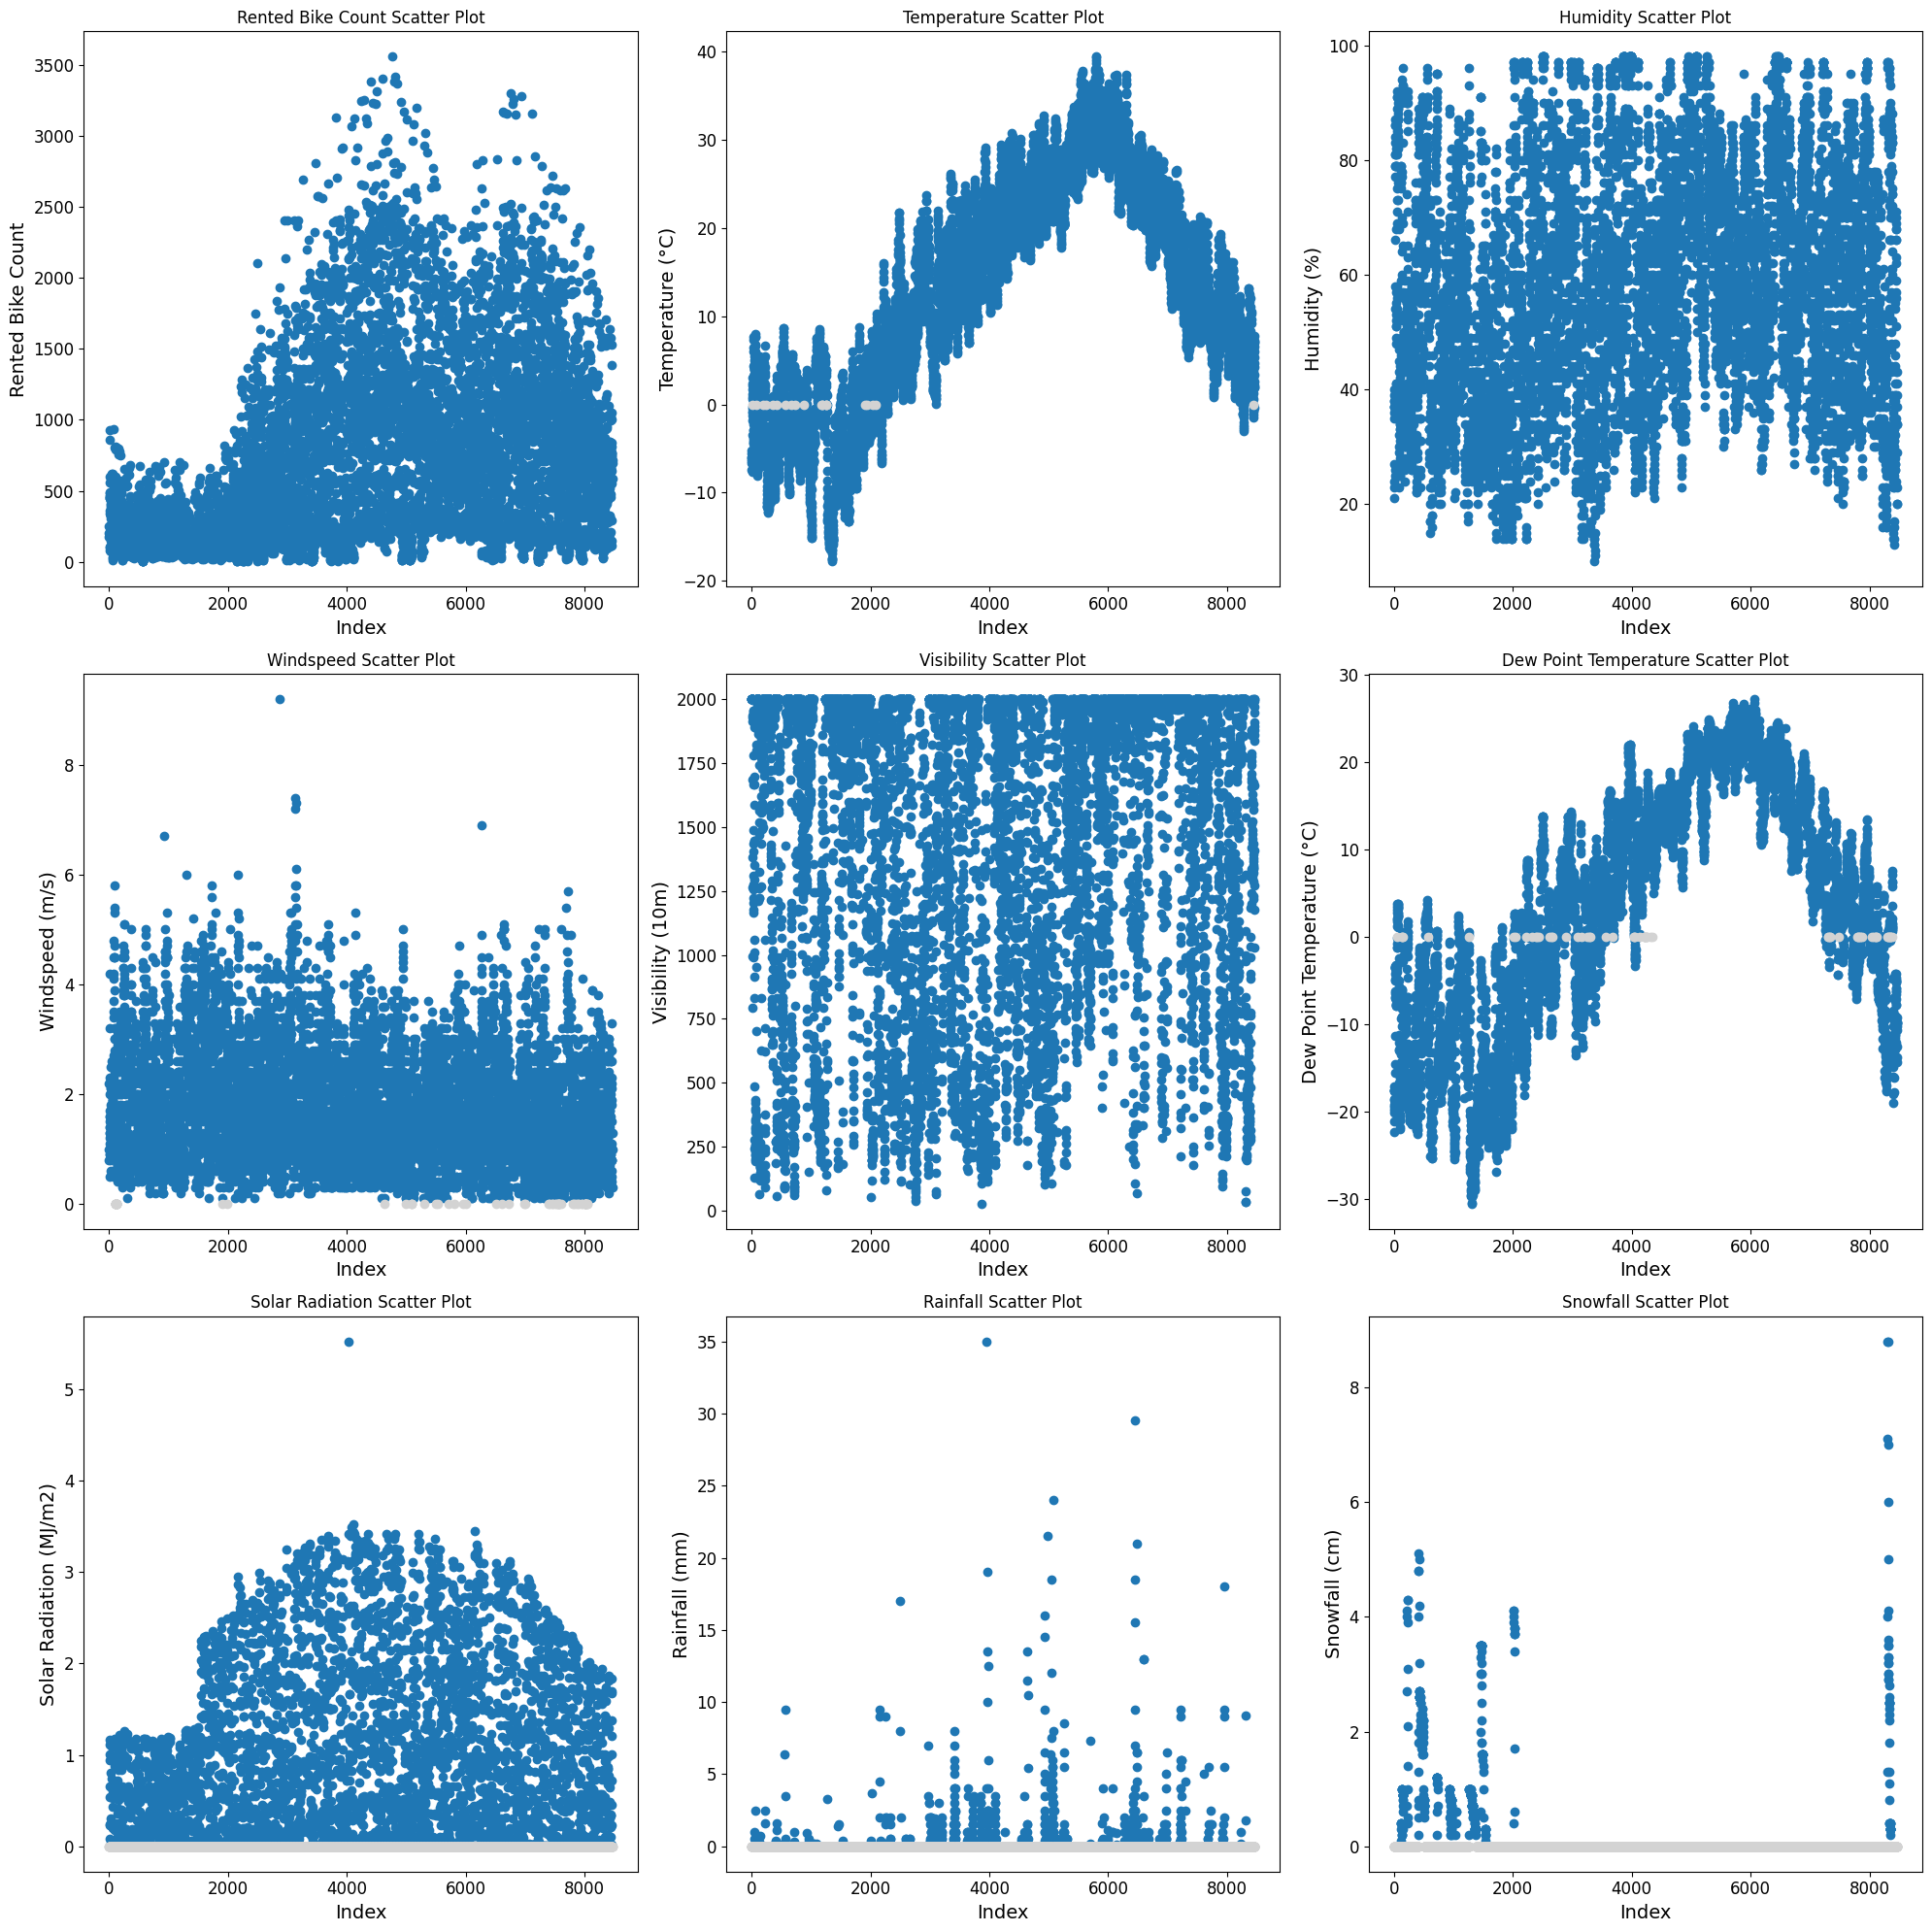

In [55]:
'''
As certain outliers can still be seen in the visualisations above, I manually inspected the data sheet and based on that wrote 
the code below to convert those specific outliers to nan values using np.nan.
'''

# Load the cleaned dataset
cleaned_data_path = "CleanedSeoulBikeData.csv"
df_cleaned = pd.read_csv(cleaned_data_path)

# Removeed specified outliers by converting them to np.nan
df_cleaned['Rented Bike Count'] = df_cleaned['Rented Bike Count'].apply(lambda x: np.nan if x > 5000 else x)
df_cleaned['Temperature (C)'] = df_cleaned.apply(lambda row: np.nan if (row['Temperature (C)'] > 35 and row['Season_Winter'] == 1) else row['Temperature (C)'], axis=1)
df_cleaned['Humidity (%)'] = df_cleaned['Humidity (%)'].apply(lambda x: np.nan if x <= 0 else x)
df_cleaned['Wind speed (m/s)'] = df_cleaned['Wind speed (m/s)'].apply(lambda x: np.nan if x in [91.8, 991.1] else x)
df_cleaned['Snowfall (cm)'] = df_cleaned['Snowfall (cm)'].apply(lambda x: np.nan if x == 99 else x)

# Added function to plot scatter plot with 0 values in lighter color
def scatter_plot_with_lighter_zero(df, column, ax):
    non_zero_mask = df[column] != 0
    zero_mask = df[column] == 0
    ax.scatter(df.index[non_zero_mask], df[column][non_zero_mask], label=column)
    ax.scatter(df.index[zero_mask], df[column][zero_mask], color='lightgray', label=f'{column} (zeros)')

# Plotted the data with scatter plots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# Rented Bike Count
scatter_plot_with_lighter_zero(df_cleaned, 'Rented Bike Count', axs[0, 0])
axs[0, 0].set_title('Rented Bike Count Scatter Plot')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Rented Bike Count')

# Temperature
scatter_plot_with_lighter_zero(df_cleaned, 'Temperature (C)', axs[0, 1])
axs[0, 1].set_title('Temperature Scatter Plot')
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_ylabel('Temperature (°C)')

# Humidity
scatter_plot_with_lighter_zero(df_cleaned, 'Humidity (%)', axs[0, 2])
axs[0, 2].set_title('Humidity Scatter Plot')
axs[0, 2].set_xlabel('Index')
axs[0, 2].set_ylabel('Humidity (%)')

# Windspeed
scatter_plot_with_lighter_zero(df_cleaned, 'Wind speed (m/s)', axs[1, 0])
axs[1, 0].set_title('Windspeed Scatter Plot')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('Windspeed (m/s)')

# Visibility
scatter_plot_with_lighter_zero(df_cleaned, 'Visibility (10m)', axs[1, 1])
axs[1, 1].set_title('Visibility Scatter Plot')
axs[1, 1].set_xlabel('Index')
axs[1, 1].set_ylabel('Visibility (10m)')

# Dew Point Temperature
scatter_plot_with_lighter_zero(df_cleaned, 'Dew point temperature (C)', axs[1, 2])
axs[1, 2].set_title('Dew Point Temperature Scatter Plot')
axs[1, 2].set_xlabel('Index')
axs[1, 2].set_ylabel('Dew Point Temperature (°C)')

# Solar Radiation
scatter_plot_with_lighter_zero(df_cleaned, 'Solar Radiation (MJ/m2)', axs[2, 0])
axs[2, 0].set_title('Solar Radiation Scatter Plot')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('Solar Radiation (MJ/m2)')

# Rainfall
scatter_plot_with_lighter_zero(df_cleaned, 'Rainfall(mm)', axs[2, 1])
axs[2, 1].set_title('Rainfall Scatter Plot')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('Rainfall (mm)')

# Snowfall
scatter_plot_with_lighter_zero(df_cleaned, 'Snowfall (cm)', axs[2, 2])
axs[2, 2].set_title('Snowfall Scatter Plot')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('Snowfall (cm)')

plt.tight_layout()
plt.show()


As can be seen from the scatter plot visualisation above, the readability of the visualisation has improved drastically in the absence of extreme or unrealistic outliers and errors. Looking at the 'Rented Bike Count', 'Temperature', 'Dew Point Temperatrue', 'Solar Radiation', 'Rainfall', and 'Snowfall', a clear seasonal pattern emerges that points towards increased rented bike counts during warmer weather days. In these features as well, 'Temperature' seems the most significant feautre impacting 'Rented Bike Count' as 'Dew Point Temperatrue', 'Solar Radiation', 'Rainfall', and 'Snowfall' are just indicators of the weather or directly impacted by or associated with changing temperature.

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [56]:
'''
The code performs preprocessing on the cleaned dataset by focusing on numerical columns. It identifies all numerical columns in 
the DataFrame df_cleaned. It then creates a pipeline with a SimpleImputer to fill missing values in these columns using the median value.
In the next step the imputation pipeline is applied to the numerical columns in the DataFrame. The processed DataFrame is then 
saved to a CSV file named "ProcessedSeoulBikeData.csv".
This process ensures that any missing values in the numerical columns are imputed with the median value, 
preparing the data for further analysis or modeling.
'''


# Ensure only numerical columns are processed
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Define the sklearn pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))  # Impute missing values with the median)
])

# Apply the pipeline to the numerical features
df_cleaned[numerical_features] = pipeline.fit_transform(df_cleaned[numerical_features])

# Save the processed data
df_cleaned.to_csv("ProcessedSeoulBikeData.csv", index=False)

print("Preprocessing completed and saved to ProcessedSeoulBikeData.csv")


print("Data has null values? ",df_cleaned.isnull().values.any())

Preprocessing completed and saved to ProcessedSeoulBikeData.csv
Data has null values?  False


In [57]:
### Your code here
# Load the cleaned dataset
processed_data_path = "ProcessedSeoulBikeData.csv"
df_processed = pd.read_csv(processed_data_path)
print(df_processed.describe())
print(df_processed.info())

       Rented Bike Count         Hour  Temperature (C)  Humidity (%)  \
count        8465.000000  8465.000000      8465.000000   8465.000000   
mean          729.103249    11.507029        12.771116     58.264855   
std           642.347788     6.920899        12.102797     20.316878   
min             2.000000     0.000000       -17.800000     10.000000   
25%           214.000000     6.000000         3.000000     42.000000   
50%           542.000000    12.000000        13.500000     57.000000   
75%          1084.000000    18.000000        22.700000     74.000000   
max          3556.000000    23.000000        39.400000     98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
count       8465.000000       8465.000000                8465.000000   
mean           1.726934       1433.873479                   3.944997   
std            1.037377        609.051229                  13.242399   
min            0.000000         27.000000                 -30.6

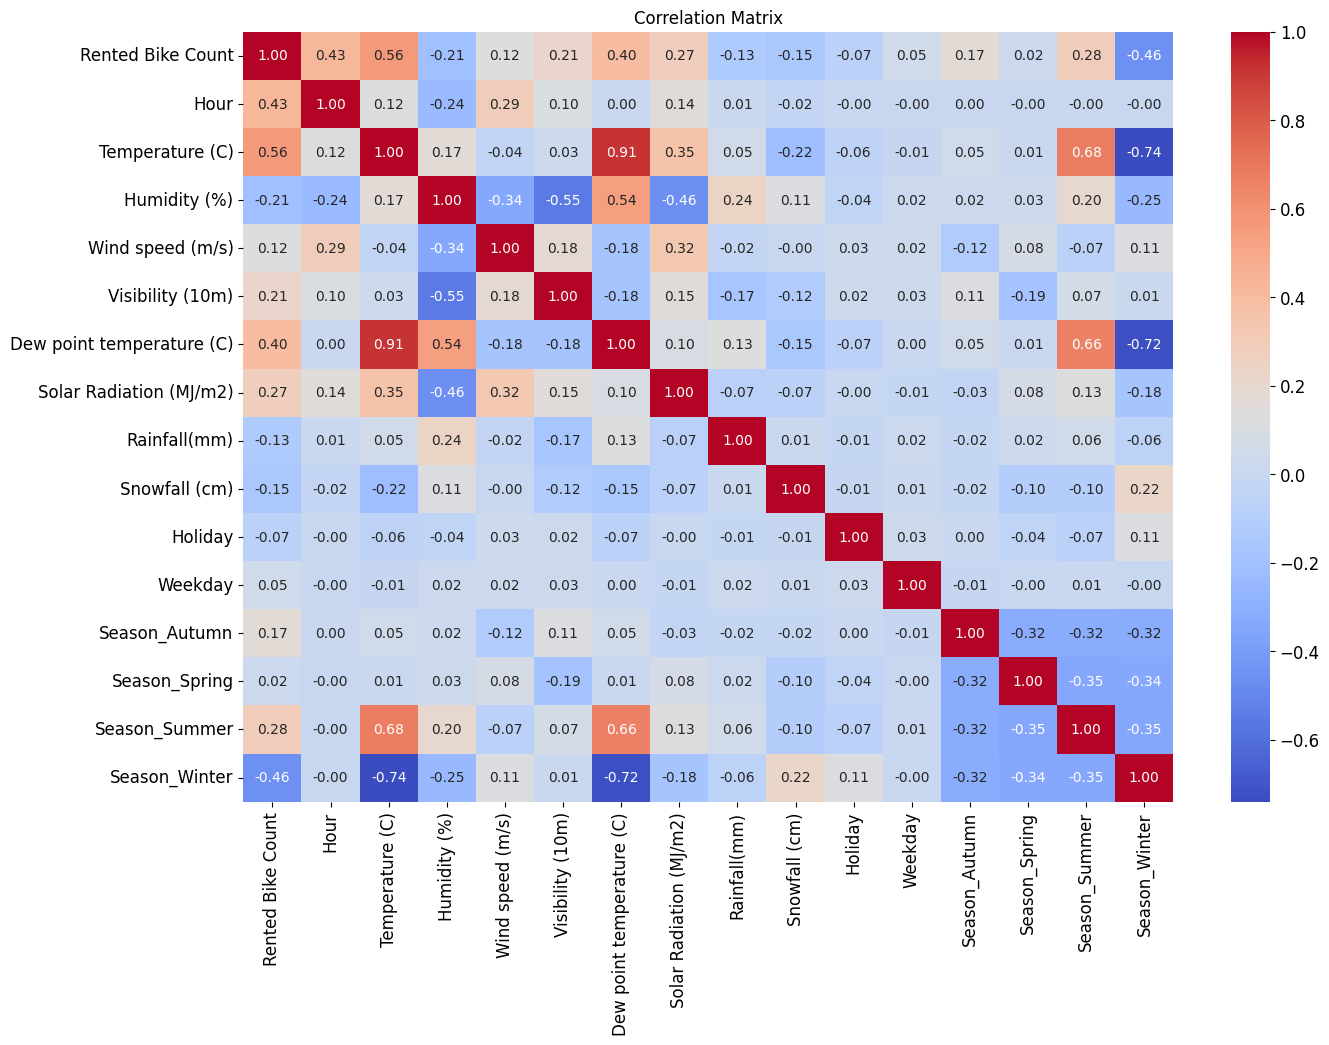

In [58]:
#Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title and labels
plt.title('Correlation Matrix')
plt.show()

The above output is a correlation matrix heatmap that visualizes the relationships between various features in the dataset. Each cell in the matrix shows the correlation coefficient between two features, with values ranging from -1 to 1. Positive values (shaded in red) indicate a positive correlation, while negative values (shaded in blue) indicate a negative correlation. The intensity of the color represents the strength of the correlation. 

The correlation matrix reveals several notable relationships between the features. "Rented Bike Count" shows a strong positive correlation with "Temperature (C)" (0.56) and a moderate positive correlation with "Hour" (0.43), suggesting that bike rentals increase with higher temperatures and certain times of the day. Conversely, there is a strong negative correlation between "Rented Bike Count" and "Season_Winter" (-0.46), indicating fewer rentals during winter.

"Temperature (C)" has an exceptionally high positive correlation with "Dew point temperature (C)" (0.91), indicating that these two variables tend to increase together. Similarly, "Temperature (C)" and "Season_Summer" (0.68) are positively correlated, which is expected as temperatures rise during summer. On the other hand, "Temperature (C)" shows a strong negative correlation with "Season_Winter" (-0.74), reflecting lower temperatures in winter.

Another interesting observation is the strong negative correlation between "Dew point temperature (C)" and "Season_Winter" (-0.72), and the moderate negative correlation between "Solar Radiation (MJ/m2)" and "Humidity (%)" (-0.46), suggesting that higher solar radiation is associated with lower humidity. 


### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [59]:
'''
The code below performs several key steps for training and evaluating a linear regression model on a processed dataset. 
Initially, it loads the dataset and splits it into features (X) and target (y). The data is then divided into training and testing sets, 
with 80% allocated for training and 20% for testing. A StandardScaler is applied to scale the features, ensuring that the training 
and test data are transformed consistently. A linear regression model is initialized and fitted to the scaled training data. 
Predictions are made on both the training and test sets. The performance of the model is evaluated using Root Mean Squared Error (RMSE), 
calculated for both training and test predictions. Additionally, a baseline RMSE is computed, representing the error if all 
predictions were the mean of the training targets. The results are printed to compare the model's performance against the baseline.
'''

# Load the processed dataset
processed_data_path = "ProcessedSeoulBikeData.csv"
df_processed = pd.read_csv(processed_data_path)

# Split the data into features and target
X = df_processed.drop(columns=['Rented Bike Count'])
y = df_processed['Rented Bike Count']

# Split the data into training and testing sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaled the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transformed the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialized and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train_scaled)

# Predict on the test data
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE on the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'RMSE on training data: {rmse_train:.2f}')

# Calculate RMSE on the test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE on test data: {rmse_test:.2f}')

# Baseline model: Calculate RMSE if all predictions were the mean of the training targets
y_train_mean_pred = np.full_like(y_train, y_train.mean())
rmse_baseline = np.sqrt(mean_squared_error(y_train, y_train_mean_pred))
print(f'Baseline RMSE: {rmse_baseline:.2f}')


RMSE on training data: 434.47
RMSE on test data: 415.81
Baseline RMSE: 646.17


The calculated RMSE values (434.47 for training and 415.81 for test data) provide a quantitative measure of the model's prediction error. The RMSE values are reasonably close, indicating that the model performs consistently on both the training and test datasets without significant overfitting. In the next step, the code creates a scatter plot to visualise the relationship between the actual and predicted bike rental counts. The x-axis represents the actual values, while the y-axis represents the predicted values from the linear regression model. The black dashed line indicates the ideal scenario where predictions perfectly match the actual values (y = x line).


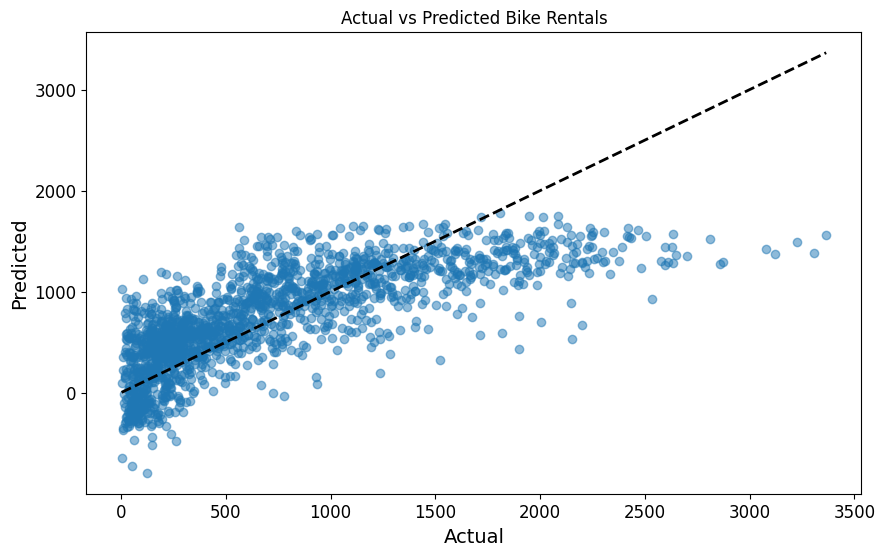

In [60]:
# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Bike Rentals')
plt.show()


Interpretation:

As can be observed from the scatter plot, the points generally follow a positive diagonal trend, indicating that the model's predictions increase with the actual bike rental counts. This suggests that the model captures the overall trend in the data reasonably well.
There is a noticeable spread of points around the diagonal line, particularly for higher bike rental counts. This spread indicates that while the model captures the trend, there is some error in the predictions. The model tends to under-predict higher bike rental counts, as shown by points below the diagonal line at higher actual values.
Some points, especially towards the higher end of bike rentals, are far from the diagonal line, indicating significant prediction errors for those instances. These outliers might be due to unusual conditions or events not captured well by the model.

## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


##chatgpt prompt
For this part of the assignment, I summarised the steps I have done so far and and then I explicitly informed ChatGPT of my objectives with the data. Below is my promt: 
I have data related to bike rentals in Seoul for the year 2017 and 2018. I have visualised the data, cleaned the data, and removed the outliers. In the next step I need to:
1. fit a linear regression and a Support Vector Regression method to the data using 10-fold cross validation for each model
2. display the mean and standard deviation of the RMSE values for each model (at baseline) in the appropriate datasets
3. perform a hyper-parameter optimisation on each model using GridSearch
4. display the mean and standard deviation of the RMSE values for each model (after optimisation) in the appropriate datasets
5. choose the best model and visualise the results with a single graphic of your choice


The first version of code produced by chatgpt had issues. The first issue is that the given code attempts to apply hyper-paramter optimisation on Liner Regression which is technically not possible. Additionally, upon execution, the code uses a deprecated argument 'squared' and that results in warning. To fix these 2 issues, I removed the hyper-paramter optimisation for Liner Regression and corrected the warning by ensuring compatibility with future versions of scikit-learn.

Linear Regression RMSE: Mean = 435.46, Std = 15.20
SVR RMSE: Mean = 540.55, Std = 23.45
Best SVR parameters: {'regressor__C': 10, 'regressor__epsilon': 0.5, 'regressor__kernel': 'rbf'}
Optimized SVR RMSE on training data: 392.16
Optimized SVR RMSE on test data: 367.83


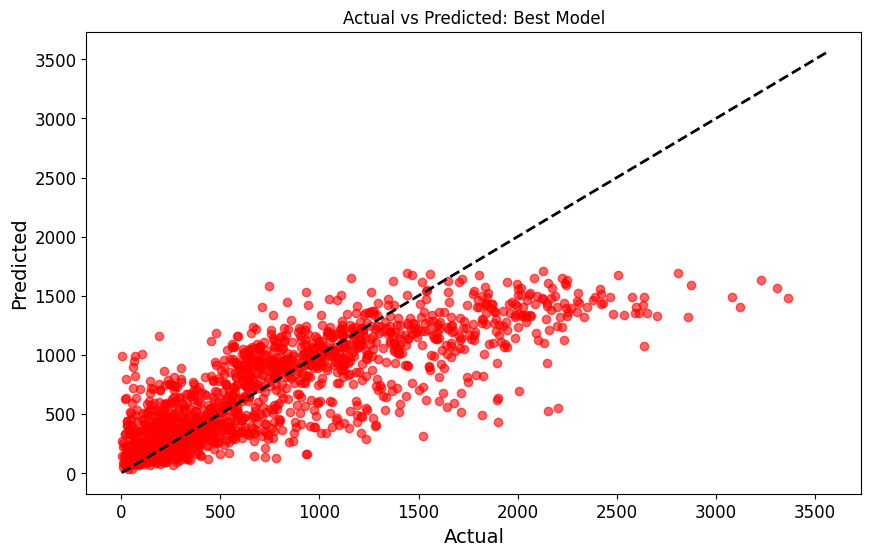

In [61]:
'''
The code below imports necessary libraries from scikit-learn and matplotlib, then loads a processed bike rental dataset from a 
CSV file into a DataFrame. It splits the dataset into features and target variables and further divides these into training 
and testing sets (80% for training, 20% for testing). Two pipelines are defined for Linear Regression and Support Vector Regression (SVR), 
both including feature scaling with `StandardScaler`. A 10-fold cross-validation strategy with mean squared error as the scoring metric 
is established. Cross-validation is performed for both models, with the RMSE mean and standard deviation printed for each. 
Hyper-parameter optimization is carried out for the SVR model using `GridSearchCV` to find the best parameters. 
Both models are then trained on the training data, and predictions are made for the training and test sets, with RMSE calculated for each. 
The test RMSEs are compared to select the best performing model. Finally, a scatter plot visualizes the actual versus predicted values 
for the best model, showing the model’s prediction accuracy.
'''

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer

# Load the processed dataset
processed_data_path = "ProcessedSeoulBikeData.csv"
df_processed = pd.read_csv(processed_data_path)

# Split the data into features and target
X = df_processed.drop(columns=['Rented Bike Count'])
y = df_processed['Rented Bike Count']

# Split the data into training and testing sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
linear_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

svr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

# Define the cross-validation strategy
cv = KFold(n_splits=10, random_state=42, shuffle=True)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Cross-validation for Linear Regression
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=cv, scoring=scorer)
linear_rmse_scores = np.sqrt(-linear_cv_scores)
print(f'Linear Regression RMSE: Mean = {linear_rmse_scores.mean():.2f}, Std = {linear_rmse_scores.std():.2f}')

# Cross-validation for SVR
svr_cv_scores = cross_val_score(svr_model, X_train, y_train, cv=cv, scoring=scorer)
svr_rmse_scores = np.sqrt(-svr_cv_scores)
print(f'SVR RMSE: Mean = {svr_rmse_scores.mean():.2f}, Std = {svr_rmse_scores.std():.2f}')

# Hyper-parameter optimization for Linear Regression (no hyper-parameters to optimize in this case)

# Hyper-parameter optimization for SVR
svr_param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.01, 0.1, 0.5],
    'regressor__kernel': ['linear', 'rbf']
}

grid_search_svr = GridSearchCV(svr_model, param_grid=svr_param_grid, cv=cv, scoring=scorer, n_jobs=-1)
grid_search_svr.fit(X_train, y_train)

print(f'Best SVR parameters: {grid_search_svr.best_params_}')
svr_best_model = grid_search_svr.best_estimator_

# Evaluate the optimized models
linear_model.fit(X_train, y_train)
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)
rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

y_train_pred_svr = svr_best_model.predict(X_train)
y_test_pred_svr = svr_best_model.predict(X_test)
rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_test_pred_svr))

print(f'Optimized SVR RMSE on training data: {rmse_train_svr:.2f}')
print(f'Optimized SVR RMSE on test data: {rmse_test_svr:.2f}')

# Choose the best model and visualize the results
best_model = svr_best_model if rmse_test_svr < rmse_test_linear else linear_model

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.6, color='r')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: Best Model')
plt.show()

#### Interpretation:

- Model Selection: SVR model is selected as the best model for predicting bike rentals.
- Prediction Accuracy: The scatter plot indicates that while the SVR model captures the general trend, there is some spread around the diagonal line, especially for higher rental counts, suggesting room for improvement.

This comprehensive approach, including cross-validation, hyper-parameter optimization, and graphical visualization, ensures robust model evaluation and selection. The SVR model's better performance demonstrates its suitability for this dataset.

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

### Improvement Explanation:

1/ In the previous steps, Linear Regression was used alongside Support Vector Regression (SVR) for model evaluation and comparison. However, Linear Regression does not have hyper-parameters to optimize, which limits its flexibility and potential improvement. As an alternative, Linear Regression can be replaced with RandomForestRegressor.

RandomForestRegressor is an ensemble learning method that constructs multiple decision trees and merges them to obtain a more accurate and stable prediction. Unlike Linear Regression, RandomForestRegressor comes with several hyper-parameters such as the number of trees (`n_estimators`), maximum depth of the trees (`max_depth`), and minimum samples per leaf (`min_samples_leaf`), which can be fine-tuned to optimize model performance. This flexibility allows for a more tailored fit to the data, potentially leading to better performance metrics.

Additionally, RandomForestRegressor can handle non-linear relationships and interactions between features more effectively than Linear Regression. It is also more robust to overfitting due to its ensemble nature. By conducting hyper-parameter optimization using GridSearchCV, we can identify the optimal set of parameters that minimize the Root Mean Squared Error (RMSE), thereby enhancing the predictive accuracy of the model.

2/ Other possible improvements that can be applied to the code is refactroing the code to add functions, so that the code can be reused and also adding exception handling for potential errors during file loading or model fitting can make the code more robust.